## Load dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/price.csv", sep=',')
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


## Exploratory Data Analysis (EDA)

In [2]:
df.shape

(7, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  7 non-null      int64
 1   Price   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


In [4]:
df.isnull().sum()

Weight    0
Price     0
dtype: int64

In [5]:
df["Weight"].head(5)

0    2
1    4
2    5
3    3
4    6
Name: Weight, dtype: int64

In [6]:
df["Price"].head(5)

0    35
1    60
2    20
3    50
4    50
Name: Price, dtype: int64

Text(0.5, 1.0, 'Weight vs Price Analysis')

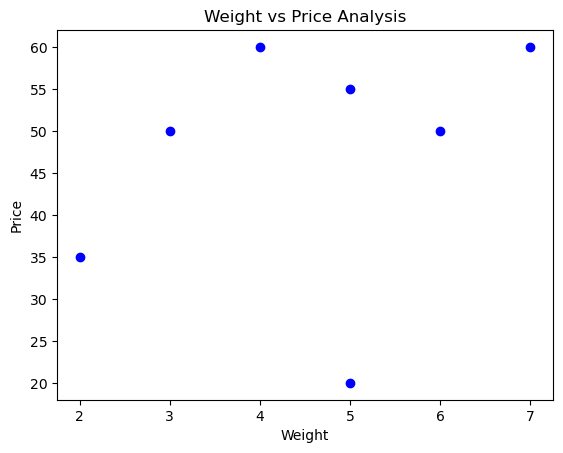

In [7]:
from matplotlib import pyplot as plt

plt.scatter(df['Weight'], df['Price'], color='blue')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price Analysis')

## Task : 01
#### Your objective is to manually compute the slope (M) and y-intercept (C) using Ordinary Least Squares Linear Regression. Once determined, apply these values to predict the price when the vegetable weight is 6.

In [8]:
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [9]:
# x is the independent variable = Weight
# y is the depedent variable = Price

x = df['Weight']
y = df['Price']

In [10]:
# Import Numpy Library

import numpy as np

In [11]:
# Find mean of x

mean_x = np.mean(x)
mean_x

4.571428571428571

In [12]:
# Find mean of y

mean_y = np.mean(y)
mean_y

47.142857142857146

In [13]:
# Calculate Deviation of x

dev_x = x - mean_x
dev_x.head(5)

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
Name: Weight, dtype: float64

In [14]:
# Calculate Deviation of y

dev_y = y - mean_y
dev_y.head(5)

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
Name: Price, dtype: float64

In [15]:
# Finding coefficient = m

m = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 

print(f"coefficient, m = {m}")

coefficient, m = 2.620967741935484


In [16]:
# Finding Intercept = c

c = mean_y - (m * mean_x)
print(f"intercept, c = {c}")

intercept, c = 35.16129032258065


In [17]:
# Find prediction for the weight = 6 using following linear equation
# y = mx + c, where x = 6 here

pred_y = (m * 6) + c

print(f"pred_y = {pred_y}")

pred_y = 50.88709677419355


## Task 02:
#### Compute the residuals for each data point

In [18]:
# Find predicted price for all weight

df['Predicted_Price'] = m * df["Weight"] + c
df.head(5)

,Weight,Price,Predicted_Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [19]:
# residiuls = actual value - predicted value
# r = y - pred_y

df['Residiuls'] = df['Price'] - df['Predicted_Price']
df.head(5)

,Weight,Price,Predicted_Price,Residiuls
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


## Task 03:
#### Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).


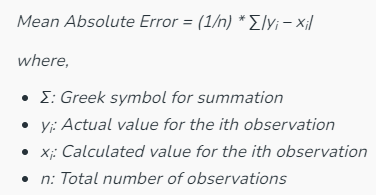

In [26]:
# Count number of records
n = df.shape[0]
n

7

In [29]:
# Find mean absolute error, MAE
# using equation

mae = np.sum(abs(df['Price'] - df['Predicted_Price']))/n
mae

9.87327188940092

In [25]:
# Alternatively, Find MAE using sklearn library
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df['Price'], df['Predicted_Price'])
mae

9.87327188940092

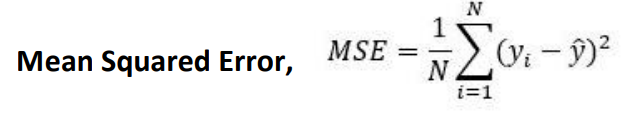

In [32]:
# Find Mean Squared Error (MSE) using equation
import math

mse = np.sum(abs(df['Price'] - df['Predicted_Price'])**2)/n
mse

167.30990783410135

In [33]:
# Find MSE using sklearn library

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['Price'], df['Predicted_Price'])
mse

167.30990783410135

## Final Task:
#### Generate an Excel file for the given dataset. Utilize Python for all the calculations.

In [37]:
df.head(5)


,Weight,Price,Predicted_Price,Residiuls
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


In [ ]:
# export dataframe into Excel
df.to_excel('data/price.xlsx', index=False)